In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Interpolation/InterpolatedDenWeekFTNT.csv')

In [3]:
df

,DATES,D Revenue,U CR,D OE,U NOI,U CAPEX,U WK,D FCF
0,2017-01-01,29454.802558,8741.418829,22661.662516,747.721810,6947.113446,54419.930444,9506.930855
1,2017-01-08,29599.842131,8682.591157,22556.645558,745.462913,6919.203240,54592.294227,9634.494082
2,2017-01-15,29744.881704,8623.763485,22451.628600,743.204015,6891.293034,54764.658011,9762.057308
3,2017-01-22,29889.921277,8564.935813,22346.611643,740.945118,6863.382828,54937.021794,9889.620535
4,2017-01-29,30034.960850,8506.108141,22241.594685,738.686221,6835.472622,55109.385577,10017.183762
...,...,...,...,...,...,...,...,...
179,2020-06-07,43132.916696,10243.565190,20555.242436,2167.005293,27651.967866,122685.109121,33800.585267
180,2020-06-14,43816.972839,10251.385875,20662.296385,2172.020027,27479.481696,122685.109121,33653.001145
181,2020-06-21,44501.028981,10259.206560,20769.350334,2177.034761,27306.995526,122685.109121,33505.417022
182,2020-06-28,45185.085123,10267.027246,20876.404283,2182.049495,27134.509357,122685.109121,33357.832899


In [4]:
df["D FCF"].mean()

15892.73759150232

In [5]:
dataset = df.values

In [6]:
dataset

array([['2017-01-01', 29454.8025583267, 8741.41882893494, ...,
        6947.11344646791, 54419.9304437262, 9506.93085520846],
       ['2017-01-08', 29599.842131179772, 8682.591156938859, ...,
        6919.2032404683705, 54592.29422714541, 9634.494081810815],
       ['2017-01-15', 29744.881704032836, 8623.763484942778, ...,
        6891.29303446883, 54764.65801056462, 9762.057308413174],
       ...,
       ['2020-06-21', 44501.02898092422, 10259.206560284292, ...,
        27306.995526294824, 122685.109120871, 33505.41702174682],
       ['2020-06-28', 45185.085123266814, 10267.027245516243, ...,
        27134.509356619663, 122685.109120871, 33357.832898978566],
       ['2020-07-05', 45869.1412656094, 10274.8479307482, ...,
        26962.0231869445, 122685.109120871, 33210.2487762103]],
      dtype=object)

In [7]:
X = dataset[:,1:7]
Y = dataset[:,7]

In [8]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)


In [9]:
X_scale

array([[0.02543623, 0.40936766, 0.37523816, 0.04709778, 0.01195643,
        0.18979726],
       [0.03404763, 0.39991804, 0.36942105, 0.0456023 , 0.01103671,
        0.19175734],
       [0.04265902, 0.39046842, 0.36360394, 0.04410682, 0.01011698,
        0.19371741],
       ...,
       [0.91877147, 0.65317325, 0.27041896, 0.99336009, 0.68287615,
        0.96609144],
       [0.95938573, 0.6544295 , 0.27634891, 0.99668005, 0.67719221,
        0.96609144],
       [1.        , 0.65568576, 0.28227885, 1.        , 0.67150827,
        0.96609144]])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(147, 6) (18, 6) (19, 6) (147,) (18,) (19,)


In [12]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [13]:
model = Sequential([
    Dense(6, activation='elu', input_shape=(6,)),
    Dense(64, activation='elu'),
    Dense(64, activation='elu'),
    Dense(64, activation='elu'),
    Dense(64, activation='elu'),
    Dense(64, activation='elu'),
    Dense(64, activation='elu'),
    Dense(1, activation='elu'),
])

In [14]:
model.compile(optimizer='rmsprop',
              loss='mean_absolute_error')

In [15]:
hist = model.fit(X_train, Y_train,
          batch_size=2, epochs=1500,
          validation_data=(X_val, Y_val))

Train on 147 samples, validate on 18 samples
Epoch 1/1500
147/147 [==============================] - 1s 9ms/step - loss: 12789.0700 - val_loss: 6147.4109
Epoch 2/1500
147/147 [==============================] - 1s 4ms/step - loss: 4546.9876 - val_loss: 6062.7536
Epoch 3/1500
147/147 [==============================] - 1s 4ms/step - loss: 4424.3155 - val_loss: 5866.8569
Epoch 4/1500
147/147 [==============================] - 1s 4ms/step - loss: 4241.0203 - val_loss: 5700.8756
Epoch 5/1500
147/147 [==============================] - 1s 4ms/step - loss: 4171.4624 - val_loss: 5796.0280
Epoch 6/1500
147/147 [==============================] - 1s 4ms/step - loss: 4035.9305 - val_loss: 5458.4042
Epoch 7/1500
147/147 [==============================] - 1s 4ms/step - loss: 3913.6868 - val_loss: 5357.2643
Epoch 8/1500
147/147 [==============================] - 1s 5ms/step - loss: 3816.2354 - val_loss: 5161.6145
Epoch 9/1500
147/147 [==============================] - 1s 4ms/step - loss: 3679.6550 - va

Epoch 76/1500
147/147 [==============================] - 1s 3ms/step - loss: 1723.3287 - val_loss: 1788.1845
Epoch 77/1500
147/147 [==============================] - 0s 3ms/step - loss: 1595.6362 - val_loss: 1869.3280
Epoch 78/1500
147/147 [==============================] - 0s 3ms/step - loss: 1533.2860 - val_loss: 1766.6808
Epoch 79/1500
147/147 [==============================] - 1s 4ms/step - loss: 1621.8659 - val_loss: 1718.4040
Epoch 80/1500
147/147 [==============================] - 1s 4ms/step - loss: 1596.7681 - val_loss: 1937.8670
Epoch 81/1500
147/147 [==============================] - 1s 3ms/step - loss: 1551.8981 - val_loss: 1801.4744
Epoch 82/1500
147/147 [==============================] - 1s 4ms/step - loss: 1649.5592 - val_loss: 1488.5914
Epoch 83/1500
147/147 [==============================] - 1s 4ms/step - loss: 1553.8120 - val_loss: 3033.5337
Epoch 84/1500
147/147 [==============================] - 1s 4ms/step - loss: 1602.3318 - val_loss: 1593.5717
Epoch 85/1500
147/1

147/147 [==============================] - 0s 2ms/step - loss: 1170.9286 - val_loss: 2139.3886
Epoch 151/1500
147/147 [==============================] - 0s 3ms/step - loss: 1193.6368 - val_loss: 2388.8502
Epoch 152/1500
147/147 [==============================] - 0s 2ms/step - loss: 1181.7582 - val_loss: 1166.6215
Epoch 153/1500
147/147 [==============================] - 0s 2ms/step - loss: 1148.4668 - val_loss: 1364.4909
Epoch 154/1500
147/147 [==============================] - 0s 2ms/step - loss: 1094.2778 - val_loss: 1407.0077
Epoch 155/1500
147/147 [==============================] - 0s 2ms/step - loss: 1177.9103 - val_loss: 1210.3644
Epoch 156/1500
147/147 [==============================] - 0s 2ms/step - loss: 1153.8948 - val_loss: 1692.8958
Epoch 157/1500
147/147 [==============================] - 0s 3ms/step - loss: 1086.5447 - val_loss: 1117.6688
Epoch 158/1500
147/147 [==============================] - 0s 2ms/step - loss: 1126.1385 - val_loss: 1745.2829
Epoch 159/1500
147/147 [=

147/147 [==============================] - 0s 3ms/step - loss: 541.6499 - val_loss: 1011.2602
Epoch 226/1500
147/147 [==============================] - 0s 2ms/step - loss: 537.4604 - val_loss: 681.6998
Epoch 227/1500
147/147 [==============================] - 0s 2ms/step - loss: 556.7822 - val_loss: 322.2155
Epoch 228/1500
147/147 [==============================] - 0s 2ms/step - loss: 544.0152 - val_loss: 1668.5920
Epoch 229/1500
147/147 [==============================] - 0s 2ms/step - loss: 514.8594 - val_loss: 1512.0570
Epoch 230/1500
147/147 [==============================] - 0s 2ms/step - loss: 556.8313 - val_loss: 502.3564
Epoch 231/1500
147/147 [==============================] - 0s 2ms/step - loss: 528.0066 - val_loss: 666.9087
Epoch 232/1500
147/147 [==============================] - 0s 2ms/step - loss: 533.3682 - val_loss: 754.4072
Epoch 233/1500
147/147 [==============================] - 0s 2ms/step - loss: 503.1418 - val_loss: 378.5371
Epoch 234/1500
147/147 [================

147/147 [==============================] - 1s 4ms/step - loss: 454.4897 - val_loss: 562.8156
Epoch 301/1500
147/147 [==============================] - 0s 3ms/step - loss: 432.4387 - val_loss: 748.0477
Epoch 302/1500
147/147 [==============================] - 0s 3ms/step - loss: 416.7354 - val_loss: 415.3998
Epoch 303/1500
147/147 [==============================] - 0s 3ms/step - loss: 441.7488 - val_loss: 783.3230
Epoch 304/1500
147/147 [==============================] - 0s 3ms/step - loss: 455.5500 - val_loss: 444.7241
Epoch 305/1500
147/147 [==============================] - 0s 3ms/step - loss: 420.8411 - val_loss: 332.7037
Epoch 306/1500
147/147 [==============================] - 0s 3ms/step - loss: 405.5473 - val_loss: 606.3002
Epoch 307/1500
147/147 [==============================] - 0s 3ms/step - loss: 437.0816 - val_loss: 359.2836
Epoch 308/1500
147/147 [==============================] - 0s 3ms/step - loss: 434.2467 - val_loss: 212.6130
Epoch 309/1500
147/147 [===================

Epoch 376/1500
147/147 [==============================] - 0s 3ms/step - loss: 401.2754 - val_loss: 262.2954
Epoch 377/1500
147/147 [==============================] - 1s 4ms/step - loss: 378.5076 - val_loss: 335.8285
Epoch 378/1500
147/147 [==============================] - 1s 4ms/step - loss: 408.9932 - val_loss: 359.6847
Epoch 379/1500
147/147 [==============================] - 1s 4ms/step - loss: 388.3760 - val_loss: 291.7836
Epoch 380/1500
147/147 [==============================] - 1s 3ms/step - loss: 411.3915 - val_loss: 644.8857
Epoch 381/1500
147/147 [==============================] - 1s 4ms/step - loss: 405.0757 - val_loss: 592.9639
Epoch 382/1500
147/147 [==============================] - 1s 4ms/step - loss: 390.4806 - val_loss: 146.9110
Epoch 383/1500
147/147 [==============================] - 0s 3ms/step - loss: 364.9674 - val_loss: 165.9963
Epoch 384/1500
147/147 [==============================] - 1s 4ms/step - loss: 378.2556 - val_loss: 472.8105
Epoch 385/1500
147/147 [====

147/147 [==============================] - 1s 4ms/step - loss: 386.7322 - val_loss: 536.0059
Epoch 452/1500
147/147 [==============================] - 1s 4ms/step - loss: 366.9105 - val_loss: 425.8435
Epoch 453/1500
147/147 [==============================] - 1s 3ms/step - loss: 368.4933 - val_loss: 401.0100
Epoch 454/1500
147/147 [==============================] - 1s 3ms/step - loss: 400.6884 - val_loss: 442.3994
Epoch 455/1500
147/147 [==============================] - 1s 3ms/step - loss: 363.1642 - val_loss: 850.5675
Epoch 456/1500
147/147 [==============================] - 1s 4ms/step - loss: 375.8508 - val_loss: 326.2686
Epoch 457/1500
147/147 [==============================] - 1s 4ms/step - loss: 374.4162 - val_loss: 1060.5112
Epoch 458/1500
147/147 [==============================] - 0s 3ms/step - loss: 382.6087 - val_loss: 407.1540
Epoch 459/1500
147/147 [==============================] - 0s 3ms/step - loss: 361.3022 - val_loss: 699.6946
Epoch 460/1500
147/147 [==================

Epoch 527/1500
147/147 [==============================] - 1s 5ms/step - loss: 365.1848 - val_loss: 781.6142
Epoch 528/1500
147/147 [==============================] - 1s 5ms/step - loss: 333.6463 - val_loss: 756.7001
Epoch 529/1500
147/147 [==============================] - 1s 6ms/step - loss: 363.2634 - val_loss: 698.3554
Epoch 530/1500
147/147 [==============================] - 1s 5ms/step - loss: 375.4351 - val_loss: 625.9895
Epoch 531/1500
147/147 [==============================] - 1s 6ms/step - loss: 348.2479 - val_loss: 312.1552
Epoch 532/1500
147/147 [==============================] - 1s 5ms/step - loss: 364.7417 - val_loss: 313.2511
Epoch 533/1500
147/147 [==============================] - 1s 5ms/step - loss: 354.8517 - val_loss: 289.9606
Epoch 534/1500
147/147 [==============================] - 1s 4ms/step - loss: 347.2575 - val_loss: 716.0232
Epoch 535/1500
147/147 [==============================] - 1s 4ms/step - loss: 372.7373 - val_loss: 467.5176
Epoch 536/1500
147/147 [====

147/147 [==============================] - 1s 5ms/step - loss: 330.6926 - val_loss: 279.7190
Epoch 603/1500
147/147 [==============================] - 1s 4ms/step - loss: 307.8446 - val_loss: 837.6298
Epoch 604/1500
147/147 [==============================] - 1s 4ms/step - loss: 346.9659 - val_loss: 1027.9116
Epoch 605/1500
147/147 [==============================] - 1s 4ms/step - loss: 347.3476 - val_loss: 287.2456
Epoch 606/1500
147/147 [==============================] - 1s 5ms/step - loss: 339.3001 - val_loss: 1062.7286
Epoch 607/1500
147/147 [==============================] - 1s 6ms/step - loss: 360.8869 - val_loss: 290.3112
Epoch 608/1500
147/147 [==============================] - 1s 5ms/step - loss: 335.5654 - val_loss: 807.2610
Epoch 609/1500
147/147 [==============================] - 1s 6ms/step - loss: 336.8676 - val_loss: 334.5236
Epoch 610/1500
147/147 [==============================] - 1s 6ms/step - loss: 334.5816 - val_loss: 425.6366
Epoch 611/1500
147/147 [=================

Epoch 678/1500
147/147 [==============================] - 1s 4ms/step - loss: 339.6339 - val_loss: 961.1081
Epoch 679/1500
147/147 [==============================] - 1s 5ms/step - loss: 323.8165 - val_loss: 796.3129
Epoch 680/1500
147/147 [==============================] - 1s 4ms/step - loss: 330.6006 - val_loss: 656.4054
Epoch 681/1500
147/147 [==============================] - 1s 4ms/step - loss: 310.1006 - val_loss: 430.5681
Epoch 682/1500
147/147 [==============================] - 0s 3ms/step - loss: 326.2252 - val_loss: 305.1525
Epoch 683/1500
147/147 [==============================] - 0s 3ms/step - loss: 311.2424 - val_loss: 223.6800
Epoch 684/1500
147/147 [==============================] - 0s 3ms/step - loss: 344.4468 - val_loss: 702.0400
Epoch 685/1500
147/147 [==============================] - 0s 3ms/step - loss: 331.7656 - val_loss: 1159.9185
Epoch 686/1500
147/147 [==============================] - 0s 3ms/step - loss: 322.9098 - val_loss: 652.1551
Epoch 687/1500
147/147 [===

Epoch 754/1500
147/147 [==============================] - 0s 2ms/step - loss: 309.7107 - val_loss: 329.7464
Epoch 755/1500
147/147 [==============================] - 0s 3ms/step - loss: 316.4871 - val_loss: 388.0589
Epoch 756/1500
147/147 [==============================] - 0s 2ms/step - loss: 320.8725 - val_loss: 331.5485
Epoch 757/1500
147/147 [==============================] - 0s 2ms/step - loss: 330.4513 - val_loss: 771.6770
Epoch 758/1500
147/147 [==============================] - 0s 2ms/step - loss: 312.3358 - val_loss: 394.4908
Epoch 759/1500
147/147 [==============================] - 0s 3ms/step - loss: 330.7316 - val_loss: 655.3966
Epoch 760/1500
147/147 [==============================] - 0s 2ms/step - loss: 344.2139 - val_loss: 255.5880
Epoch 761/1500
147/147 [==============================] - 0s 2ms/step - loss: 317.6549 - val_loss: 621.8288
Epoch 762/1500
147/147 [==============================] - 0s 3ms/step - loss: 325.7849 - val_loss: 464.1774
Epoch 763/1500
147/147 [====

147/147 [==============================] - 0s 2ms/step - loss: 313.5863 - val_loss: 373.1293
Epoch 830/1500
147/147 [==============================] - 0s 2ms/step - loss: 306.3858 - val_loss: 161.2674
Epoch 831/1500
147/147 [==============================] - 0s 2ms/step - loss: 311.6375 - val_loss: 364.2463
Epoch 832/1500
147/147 [==============================] - 0s 2ms/step - loss: 318.6796 - val_loss: 222.5444
Epoch 833/1500
147/147 [==============================] - 0s 3ms/step - loss: 328.8353 - val_loss: 286.0081
Epoch 834/1500
147/147 [==============================] - 0s 2ms/step - loss: 316.6144 - val_loss: 869.7457
Epoch 835/1500
147/147 [==============================] - 0s 3ms/step - loss: 324.6896 - val_loss: 231.8423
Epoch 836/1500
147/147 [==============================] - 0s 2ms/step - loss: 315.4961 - val_loss: 119.2799
Epoch 837/1500
147/147 [==============================] - 0s 2ms/step - loss: 286.3974 - val_loss: 318.4850
Epoch 838/1500
147/147 [===================

Epoch 905/1500
147/147 [==============================] - 1s 4ms/step - loss: 305.7353 - val_loss: 485.9371
Epoch 906/1500
147/147 [==============================] - 0s 3ms/step - loss: 310.0465 - val_loss: 90.2948
Epoch 907/1500
147/147 [==============================] - 1s 4ms/step - loss: 294.9050 - val_loss: 600.7471
Epoch 908/1500
147/147 [==============================] - 0s 2ms/step - loss: 284.4867 - val_loss: 130.2662
Epoch 909/1500
147/147 [==============================] - 0s 2ms/step - loss: 289.6949 - val_loss: 298.3479
Epoch 910/1500
147/147 [==============================] - 1s 6ms/step - loss: 304.6988 - val_loss: 298.7789
Epoch 911/1500
147/147 [==============================] - 0s 2ms/step - loss: 330.7933 - val_loss: 943.8787
Epoch 912/1500
147/147 [==============================] - 0s 3ms/step - loss: 296.3417 - val_loss: 418.7751
Epoch 913/1500
147/147 [==============================] - 0s 2ms/step - loss: 303.0859 - val_loss: 999.6158
Epoch 914/1500
147/147 [=====

147/147 [==============================] - 0s 3ms/step - loss: 294.5725 - val_loss: 509.5118
Epoch 981/1500
147/147 [==============================] - 0s 3ms/step - loss: 288.5449 - val_loss: 686.9534
Epoch 982/1500
147/147 [==============================] - 0s 3ms/step - loss: 283.5686 - val_loss: 272.9939
Epoch 983/1500
147/147 [==============================] - 0s 2ms/step - loss: 292.5666 - val_loss: 645.3685
Epoch 984/1500
147/147 [==============================] - 0s 2ms/step - loss: 299.4036 - val_loss: 257.8565
Epoch 985/1500
147/147 [==============================] - 0s 2ms/step - loss: 297.8623 - val_loss: 470.3723
Epoch 986/1500
147/147 [==============================] - 0s 2ms/step - loss: 295.4463 - val_loss: 346.6633
Epoch 987/1500
147/147 [==============================] - 0s 2ms/step - loss: 279.1198 - val_loss: 276.0756
Epoch 988/1500
147/147 [==============================] - 0s 2ms/step - loss: 291.9392 - val_loss: 283.4913
Epoch 989/1500
147/147 [===================

147/147 [==============================] - 0s 3ms/step - loss: 284.8752 - val_loss: 334.9900
Epoch 1056/1500
147/147 [==============================] - 0s 3ms/step - loss: 292.1856 - val_loss: 172.3637
Epoch 1057/1500
147/147 [==============================] - 0s 3ms/step - loss: 294.9725 - val_loss: 701.0901
Epoch 1058/1500
147/147 [==============================] - 1s 4ms/step - loss: 293.4999 - val_loss: 177.3536
Epoch 1059/1500
147/147 [==============================] - 1s 4ms/step - loss: 278.4312 - val_loss: 360.5409
Epoch 1060/1500
147/147 [==============================] - 0s 3ms/step - loss: 278.6531 - val_loss: 543.2006
Epoch 1061/1500
147/147 [==============================] - 0s 3ms/step - loss: 289.3981 - val_loss: 338.6247
Epoch 1062/1500
147/147 [==============================] - 0s 3ms/step - loss: 278.3292 - val_loss: 111.1412
Epoch 1063/1500
147/147 [==============================] - 0s 2ms/step - loss: 272.5902 - val_loss: 195.6246
Epoch 1064/1500
147/147 [==========

147/147 [==============================] - 0s 2ms/step - loss: 306.8098 - val_loss: 268.2056
Epoch 1131/1500
147/147 [==============================] - 0s 3ms/step - loss: 271.0181 - val_loss: 306.3708
Epoch 1132/1500
147/147 [==============================] - 0s 3ms/step - loss: 290.1134 - val_loss: 337.1519
Epoch 1133/1500
147/147 [==============================] - 0s 3ms/step - loss: 273.7985 - val_loss: 411.3198
Epoch 1134/1500
147/147 [==============================] - 0s 3ms/step - loss: 286.6980 - val_loss: 139.9586
Epoch 1135/1500
147/147 [==============================] - 0s 3ms/step - loss: 268.3429 - val_loss: 141.5278
Epoch 1136/1500
147/147 [==============================] - 0s 3ms/step - loss: 289.1157 - val_loss: 1010.4081
Epoch 1137/1500
147/147 [==============================] - 0s 3ms/step - loss: 298.9481 - val_loss: 273.6572
Epoch 1138/1500
147/147 [==============================] - 0s 3ms/step - loss: 277.9043 - val_loss: 558.1744
Epoch 1139/1500
147/147 [=========

147/147 [==============================] - 0s 3ms/step - loss: 267.4877 - val_loss: 316.5763
Epoch 1205/1500
147/147 [==============================] - 0s 3ms/step - loss: 273.0351 - val_loss: 400.4131
Epoch 1206/1500
147/147 [==============================] - 0s 3ms/step - loss: 279.0728 - val_loss: 351.3819
Epoch 1207/1500
147/147 [==============================] - 0s 3ms/step - loss: 297.0212 - val_loss: 386.1383
Epoch 1208/1500
147/147 [==============================] - 1s 3ms/step - loss: 262.2982 - val_loss: 704.1373
Epoch 1209/1500
147/147 [==============================] - 1s 4ms/step - loss: 263.2200 - val_loss: 329.5358
Epoch 1210/1500
147/147 [==============================] - 0s 3ms/step - loss: 259.3567 - val_loss: 465.2852
Epoch 1211/1500
147/147 [==============================] - 0s 3ms/step - loss: 294.0592 - val_loss: 193.9534
Epoch 1212/1500
147/147 [==============================] - 0s 3ms/step - loss: 268.2917 - val_loss: 428.8740
Epoch 1213/1500
147/147 [==========

147/147 [==============================] - 0s 2ms/step - loss: 267.4519 - val_loss: 278.9526
Epoch 1280/1500
147/147 [==============================] - 0s 3ms/step - loss: 264.9887 - val_loss: 335.8307
Epoch 1281/1500
147/147 [==============================] - 0s 3ms/step - loss: 268.9431 - val_loss: 744.9533
Epoch 1282/1500
147/147 [==============================] - 0s 3ms/step - loss: 233.6788 - val_loss: 1087.1310
Epoch 1283/1500
147/147 [==============================] - 0s 3ms/step - loss: 293.1752 - val_loss: 505.2300
Epoch 1284/1500
147/147 [==============================] - 0s 3ms/step - loss: 261.2146 - val_loss: 237.6306
Epoch 1285/1500
147/147 [==============================] - 0s 3ms/step - loss: 266.9891 - val_loss: 158.3118
Epoch 1286/1500
147/147 [==============================] - 0s 3ms/step - loss: 248.4812 - val_loss: 933.3190
Epoch 1287/1500
147/147 [==============================] - 1s 4ms/step - loss: 257.5168 - val_loss: 514.7625
Epoch 1288/1500
147/147 [=========

147/147 [==============================] - 0s 2ms/step - loss: 261.7119 - val_loss: 355.1962
Epoch 1354/1500
147/147 [==============================] - 0s 2ms/step - loss: 251.2634 - val_loss: 76.6093
Epoch 1355/1500
147/147 [==============================] - ETA: 0s - loss: 262.771 - 0s 3ms/step - loss: 258.5258 - val_loss: 165.7310
Epoch 1356/1500
147/147 [==============================] - 0s 2ms/step - loss: 244.2686 - val_loss: 890.7900
Epoch 1357/1500
147/147 [==============================] - 0s 3ms/step - loss: 248.4966 - val_loss: 514.4182
Epoch 1358/1500
147/147 [==============================] - 0s 3ms/step - loss: 266.1535 - val_loss: 235.1897
Epoch 1359/1500
147/147 [==============================] - 0s 3ms/step - loss: 260.6714 - val_loss: 451.9843
Epoch 1360/1500
147/147 [==============================] - 0s 3ms/step - loss: 265.3746 - val_loss: 543.5826
Epoch 1361/1500
147/147 [==============================] - 0s 2ms/step - loss: 258.2772 - val_loss: 220.5482
Epoch 1362

147/147 [==============================] - 0s 3ms/step - loss: 255.7100 - val_loss: 228.8093
Epoch 1428/1500
147/147 [==============================] - 0s 2ms/step - loss: 248.5048 - val_loss: 191.6069
Epoch 1429/1500
147/147 [==============================] - 1s 4ms/step - loss: 250.7275 - val_loss: 1036.9346
Epoch 1430/1500
147/147 [==============================] - 1s 5ms/step - loss: 268.5982 - val_loss: 289.0034
Epoch 1431/1500
147/147 [==============================] - 0s 3ms/step - loss: 262.9101 - val_loss: 581.1297
Epoch 1432/1500
147/147 [==============================] - 0s 3ms/step - loss: 253.4471 - val_loss: 523.9955
Epoch 1433/1500
147/147 [==============================] - 0s 3ms/step - loss: 242.2262 - val_loss: 665.1004
Epoch 1434/1500
147/147 [==============================] - 1s 5ms/step - loss: 253.2473 - val_loss: 117.4618
Epoch 1435/1500
147/147 [==============================] - 1s 6ms/step - loss: 245.7156 - val_loss: 517.2804
Epoch 1436/1500
147/147 [=========

In [16]:
import matplotlib.pyplot as plt

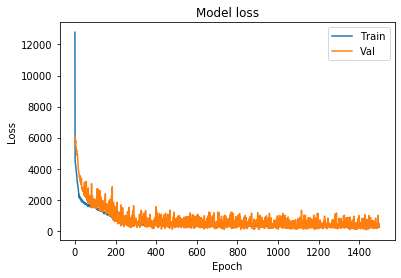

In [17]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [18]:
# serialize model to JSON
model_json = model.to_json()
with open("modelden.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("modelden.h5")
print("Saved model to disk")

Saved model to disk


In [19]:
import numpy as np
from numpy import array
arr = []
for x in range(len(X_scale)):
    Xnew = array([[X_scale[x][0], X_scale[x][1] , X_scale[x][2], X_scale[x][3], X_scale[x][4], X_scale[x][5]]])
    ynew = model.predict(Xnew)
    #print(ynew[0][0])
    arr.append(ynew[0][0])
array = np.array(arr)

In [20]:
from sklearn.metrics import r2_score
r2_score(Y.tolist(), array.tolist())

0.9944280123272012